In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Interpolação e extrapolação

Como resultado de experimentos ou simulações, as vezes temos um conjunto de pontos na forma:

\begin{equation}
{\rm data} = \left((x_0,f(x_0)),(x_1,f(x_1)),\ldots,(x_n,f(y_n))\right)
\end{equation}

mas não temos uma expresão, $f(x)$ que nos permita calcular o valor da função em qualquer ponto arbitrario $x$. Muitas vezes os $x_i$ são igualmente espaçados, mas nem sempre.

Nossa tarefa é estimar essa função, $f(x)$ trazando uma curva suave a traves de todos, e quizas ultrapassando, os valores de $x$. Se o $x$ desejado se encontra entre o mínimo e o máximo dos dados, o problema é chamado *interpolação*. Se o $x$ está fora dos nossos dados o problema é chamado extrapolação.

Os dois problemas devem representar essa função com uma forma funcional que seja o mais geral possível. As formas funcionais mais comúns são os *polinomios*. Funções trigonométricas, senos e cosenos, também permitem fazer interpolação como os chamados métodos de Fourier que estudaremos em outro capítulo.  Nos casos onde a conservação da continuidade das derivadas é necessário, utilizam-se métodos *splines*. O mais conhecido desses métodos é o de *splines* cúbicos. 

Conceitualmente o processo da interpolação tem dois etapas: (1) ajustar uma função aos dados e (2) avaliar essa função ao ponto arbitrario $x$.   O número de pontos usado para realizar a interpolação representa a **ordem** da interpolação. 


Nesse capítulo vamos descrever em detalhe os métodos polinomial e de *splines* cubico.  As rotinas de interpolação são também rutinas de extrapolação, que no entanto, devem ser consideradas com muito cuidado. 


## a) Interpolação e extrapolação polinomial

Asumindo que temos um conjunto de $N+1$ pontos, queremos determinar um polinomio de grau N, tal que

\begin{equation}
P_N(x_i) = f(x_i) = y_i  \;\;, i = 0,1, \ldots , N \;.
\end{equation}

Se escrevemos $P_N$ da forma:

\begin{equation}
P_N(x) = a_0 + a_1 (x-x_0) + a_2 (x-x_0)(x-x_1) + \ldots + a_N (x-x_0) \ldots (x-x_{N-1}) \;,
\end{equation}


Então a equação acima resulta num sistema triangular de equações:

\begin{eqnarray}
a_0 &=& f(x_0) \\\nonumber
a_0 + a_1 (x_1-x_0) &=& f(x_1) \\\nonumber
a_0 + a_1 (x_2-x_0) + a_2 (x_2-x_0)(x_2-x_1) &=& f(x_2) \\\nonumber
\ldots \; \ldots \; \ldots
\end{eqnarray}

Os coeficientes $a_0, \ldots, a_N$ podem ser determinados de forma recursiva, começando por $a_0$, depois $a_1$ e assim por diante. 

Por exemplo, se temos unicamente dois pontos (uma linha reta), então o polinomio ficara:

\begin{equation}
P_1(x) =  \frac{x - x_0}{x_1 - x_0} y_1 + \frac{x - x_1}{x_0 - x_1} y_0
\end{equation}

e com 3 pontos (aproximação parabólica) temos:

\begin{equation}
P_1(x) =  \frac{(x - x_0)(x-x_1)}{(x_2 - x_0)(x_2 - x_1)} y_2 
       + \frac{(x - x_0)(x-x_2)}{(x_1 - x_0)(x_1-x_2)} y_1 
       + \frac{(x - x_1)(x-x_2)}{(x_0 - x_1)(x_0-x_2)} y_0 
\end{equation}

A fórmula clásica que simplifica a interpolação foi criada por Lagrange e é dada por:

\begin{equation}
P_N(x) =  \sum_{i=0}^N y_i\left(\prod_{k \neq i} \frac{x-x_k}{x_i-x_k} \right)
\end{equation}


E assim sucessivamente. Da equação acima é possivel ver que quando $x=x_i$, temos que $f(x) = f(x_i)$. 



### Algoritmo de Neville



É possível resolver numericamente a equação (7) para encontrar coeficientes e o polinomio que interpola os pontos conhecidos. Porém o programa resultante não prove indicativos do erro. Um método muito melhor é o chamado *algoritmo de Neville*. 

* Seja $P_0$ o valor em $x$ de um polinomio de grau zero (uma constante) que passa a traves dos pontos $(x_0,y_0)$, ou seja, $P_0 = y_0$.  Da mesma forma definimos $P_1$, $P_2$, $\ldots , P_n$ (lembrese que n = N-1).  

* Seja $P_{01}$ o valor de $x$ do unico polinomio de grau 1 passando pelos pontos $(x_0,y_0)$ e $(x_1,y_1)$ (uma linha reta).  Da mesma forma encontramos $P_{12}$, $P_{23}$, $\ldots \; P_{(n-1)n}$.  

* Fazemos o mesmo para ordens maiores até encontrar o polinomio $P_{0123 \ldots n}$, que é o valor do polinomio interpolante que passa por todos os $n$ pontos. Ou seja, a nossa resposta. 

Os varios $P_{\prime s}$ formam uma árbore com parentes à esquerda e deixando à direita um unico descendente. Por exemplo, se temos 4 pontos, $n=3$: 


\begin{matrix}
x_0: \; y_0 = P_0 &               &           & \\
                 &  P_{01}  &                 & \\
x_1: \; y_1 = P_1 &               &  P_{012}  & \\
                 &  P_{12}  &                 & P_{0123}    \\
x_2: \; y_2 + P_2 &               &  P_{123}  & \\
                 &  P_{23}  &                 & \\
x_3: \; y_3 = P_3&               &            & \\           
\end{matrix}

Existe uma relação de recurrencia que permite encontrar os polinomios de cada "geração" como função dos "parentes" mais próximos:

\begin{eqnarray}
P_{ii} &=& y_i \hspace{7 cm} {\rm para} \; 0 \le i \le n \\\nonumber
P_{ij} &=& \frac{(x-x_j) P_{i,j-1}   - (x - x_i) P_{i+1,j}}{x_i - x_j} \hspace{1.3cm} {\rm para} \; 0 \le i \le k \le n
\end{eqnarray}

Com a qual a àrbore acima ficaria:

\begin{matrix}
x_0: \; y_0 = P_{00} &               &           & \\
                 &  P_{01}  &                 & \\
x_1: \; y_1 = P_{11} &               &  P_{02}  & \\
                 &  P_{12}  &                 & P_{03}    \\
x_2: \; y_2 + P_{22} &               &  P_{13}  & \\
                 &  P_{23}  &                 & \\
x_3: \; y_3 = P_{33}&               &            & \\           
\end{matrix}

Uma melhora do algoritmo de Neville é contabilizar as pequenas diferencas entre parentes e filhos, ou seja, para cada filho, existirão duas diferenças:

\begin{eqnarray}
C_{i,j+1} &=& P_{i,j+1} - P_{i,j} \\\nonumber
D_{i,j+1} &=& P_{i,j+1} - P_{i+1,j+1}
\end{eqnarray}

Depois de substituir em (1), obtemos:

\begin{eqnarray}
D_{i,j} &=& \frac{(x_j - x) (C_{i+1,j+1} - D_{i,j+1})}{x_i-x_j} \\\nonumber
C_{i,j} &=& \frac{(x_i - x) (C_{i+1,j+1} - D_{i,j+1})}{x_i-x_j}
\end{eqnarray}

A cada nível $m$, os valores de $C$ e $D$ são correções que levam a interpolação a uma ordem maior. O resultado final é a soma de todos os $C's$ e/ou $D's$ que formam o caminho atraves da árbore até o ponto mais à direita. O seguinte algorítmo considera essa implementação do metodo de Neville. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
# Neville Algorithm:
#
# O algoritmo tem 3 partes, 
# Na primeira encontra o indice mais proximo do
# valor de x onde se quer estimar f(x)
def polint(xa,ya,x):
    n = xa.size
    c = np.copy(ya)
    d = np.copy(ya)
    ns=1
    dy = 0.
    # dif eh a diferenca do valor de entrada x com o primeiro valor 
    # de nossos dados xa[0]
    # dift eh um array, com a diferenca entre x e cada um dos xa
    dif = abs(x - xa[0])
    dift = np.abs(x - xa)
    for i in range (n):
        if (dift[i] < dif):
            ns = i
            dif = dift[i]
    # depois desse loop ns é o índice de xa mais próximo de x
    # ya é o valor de ya nesse indice
    y = ya[ns]
    ns = ns-1
    
    # Segunda parte: calcula os polinomios C e D de esquerda 
    # a direita, no loop mais externo m vai desde o primeiro ponto, m=0
    # até o penultimo ponto n-2
    for m in range(n-1):
        # o loop interno inicialmente tem n-1 elementos
        # esse número vai diminuindo em 1 a cada iteracao
        for i in range(0,(n-m-1)):
            ho = xa[i] - x
            hp = xa[i+m+1] - x
            w = c[i+1]-d[i]
            den = ho - hp
            if (den == 0):
                print('Error, den=0')
                break
            den = w/den
            d[i] = hp*den
            c[i] = ho*den
                
        #Terceira parte: Escolhemos o caminho pelo qual o erro é 
        # mínimo. 
        if (2*ns < n-m-2):
            dy = c[ns+1]
        else:
            dy = d[ns]
            ns = ns-1
        y = y+dy
    return y, dy

In [3]:
# Criamos alguns POUCOS valores de x
# e seus correspondentes valores de y
xb = np.linspace(0.,np.pi,5)
yb = np.sin(xb)


# Criamos valores de x para os quais não conhecemos os valores de y
# e chamamos a funcao polint para cada ponto x
N = 32
x = np.linspace(0.,np.pi,N)
f = np.zeros_like(x)
err = np.zeros_like(x)
for k in range(N):
    f[k], err[k] = polint(xb,yb,x[k])

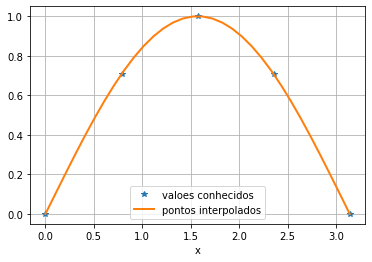

In [4]:
plt.plot(xb,yb,'*', label='valoes conhecidos')
plt.plot(x,f, '-', lw=2, label='pontos interpolados')
plt.xlabel('x')
plt.legend()
plt.grid()

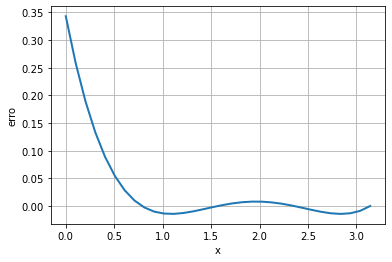

In [5]:
plt.plot(x,err, '-', lw=2)
plt.xlabel('x')
plt.ylabel('erro')
plt.grid()

In [8]:
n=4
for m in range(n-1):
    for i in range(0,(n-m-1)):
        print(m,i,i+m+1)

0 0 1
0 1 2
0 2 3
1 0 2
1 1 3
2 0 3
